## Importing Relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os

## Loading Data

In [2]:
data=pd.read_csv('Car_Price.csv')

In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Data Preprocessing

* Describing the dataset

In [4]:
data.describe() # it will describe only numerical values

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data.describe(include='all') # It will give description for categorical values also.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


* Removing columns of no interest

In [6]:
data=data.drop(['Body','Model'],axis=1)

* Checking Missing values

In [7]:
data.isnull() #it shows all the missing values as true and present value as false

,Brand,Price,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False
4343,False,False,False,True,False,False,False


In [8]:
data.isnull().sum() # Used to check the missing values, if sum is 1 or more than 1 we can assume that the dataset have missing values

Brand             0
Price           172
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

here 'Price' and 'Engine V' attributes have missing values

In [9]:
data_nmv=data.dropna(axis=0) # is used to remove the rows which are having missing values. now the row count of new dataset will be reduced

In [10]:
data_nmv

,Brand,Price,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,358,5.0,Gas,yes,2003
3,Audi,23000.0,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...
4339,Toyota,17900.0,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,194,2.0,Petrol,yes,1985


In [11]:
data_nmv.describe(include='all')

,Brand,Price,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the Probability Density Function using sns

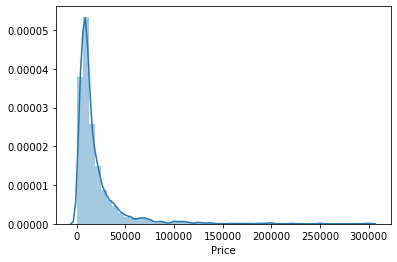

In [12]:
sns.distplot(data_nmv['Price'])
plt.show()

The distplot shows the above attribute have outliers in the data. We need to introduce quantile in these attribute by eliminating 0.1 % of the data

In [13]:
q = data_nmv['Price'].quantile(0.99)

In [14]:
data_1=data_nmv[data_nmv['Price']<q]

In [15]:
data_1.describe(include='all')

,Brand,Price,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,230.000000,3.000000,NaN,NaN,2011.000000


Now we can see the Max value is changed from 300000.00000 to 129222.00000, 
Lets plot and check

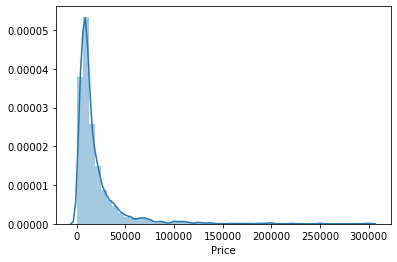

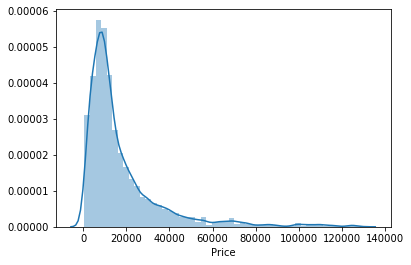

In [16]:
sns.distplot(data_nmv['Price'])
plt.show()
sns.distplot(data_1['Price'])
plt.show()

The above two graph shows the outliers are reduced We need to check the same for other numerical values. ie Year, Mileage and Engine Volume

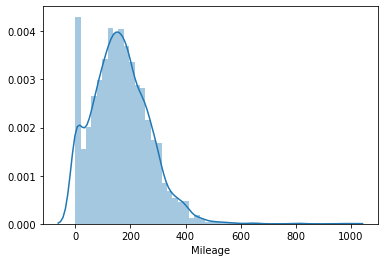

In [17]:
sns.distplot(data_1['Mileage'])

In [18]:
q=data_1['Mileage'].quantile(0.99)

In [19]:
data_2=data_1[data_1['Mileage']<q]

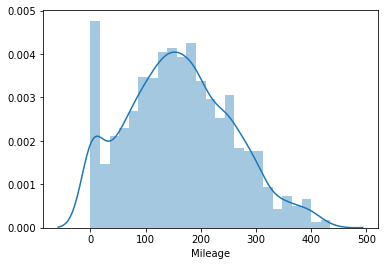

In [20]:
sns.distplot(data_2['Mileage'])

For Mileage also, We have reduced the outliers.Lets check for Year data

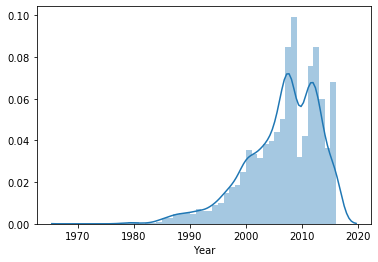

In [21]:
sns.distplot(data_2['Year'])

year data have outliers in the begining, so We must quantile in 0.1 

In [22]:
 q=data_2['Year'].quantile(0.01)

In [23]:
data_3=data_2[data_2['Year']>q]

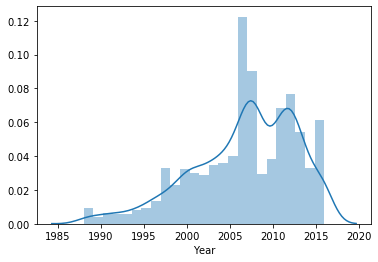

In [24]:
sns.distplot(data_3['Year'])
plt.show()

By compairing the two plots of year, we can see the graph outliers are decreased.

Now, lets work on the last variable ie EngineV. As per Mechanic Specs, Engine volume value will be max 6.5, So we will remove all values greater than 6.5

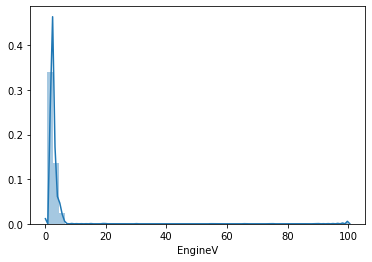

In [25]:
sns.distplot(data_3['EngineV'])
plt.show()

In [26]:
data_4=data_3[data_3['EngineV']<6.5]

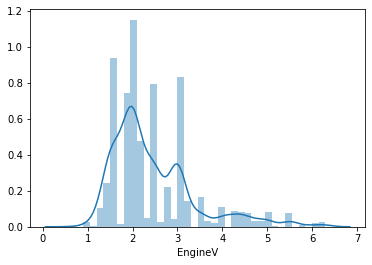

In [27]:
sns.distplot(data_4['EngineV'])

In [28]:
data_f=data_4.reset_index(drop=True)

In [29]:
data_f.describe(include='all')

,Brand,Price,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,225.000000,3.000000,NaN,NaN,2012.000000


## Checking Assumptions

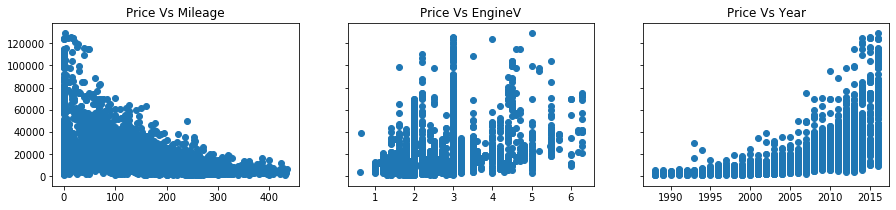

In [30]:
f, (ax1,ax2,ax3)=plt.subplots(1 , 3,  sharey=True, figsize=(15,3))
ax1.scatter(data_f['Mileage'],data_f['Price'])
ax1.set_title('Price Vs Mileage')
ax2.scatter(data_f['EngineV'],data_f['Price'])
ax2.set_title('Price Vs EngineV')
ax3.scatter(data_f['Year'],data_f['Price'])
ax3.set_title('Price Vs Year')

plt.show()

As per the plot, it shows there is no any linear distribution between variables. So lets take the log of price for making a linear relation

In [31]:
data_f['log_price']=np.log(data_f['Price'])

In [32]:
data_f.describe()

,Price,Mileage,EngineV,Year,log_price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,9.415703
std,19085.855165,95.633291,0.949366,6.103870,0.876616
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7200.000000,91.000000,1.800000,2003.000000,8.881836
50%,11700.000000,157.000000,2.200000,2008.000000,9.367344
75%,21700.000000,225.000000,3.000000,2012.000000,9.985068
max,129222.000000,435.000000,6.300000,2016.000000,11.769287


Now, Lets Plot the scatter plot again

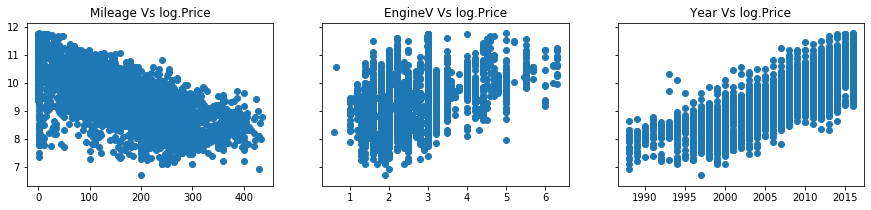

In [33]:
f, (ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_f['Mileage'],data_f['log_price'])
ax1.set_title('Mileage Vs log.Price')
ax2.scatter(data_f['EngineV'],data_f['log_price'])
ax2.set_title('EngineV Vs log.Price')
ax3.scatter(data_f['Year'],data_f['log_price'])
ax3.set_title('Year Vs log.Price')

plt.show()

Now We can see the above 3 variables are linearly distributed

## Checking Multicolinearity ## 
using VIF(Variance inflation factor)

In [34]:
data_f.columns.values

array(['Brand', 'Price', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_f[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns

In [36]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


vif value range must be from 1 to 5 as acceptable case. 
Here, the 'year' value is showing 10.35 which to be omitted.

In [37]:
data_nmc=data_f.drop(['Year'], axis=1)

In [38]:
data_nmc.head()

,Brand,Price,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,120,2.0,Petrol,yes,9.814656


## Dealing with Dummy / Categorical Values

In [39]:
Data_d=pd.get_dummies(data_nmc, drop_first=True)


In [40]:
Data_d.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,1,1


In [41]:
Data_d.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
cols=['log_price','Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [43]:
data_Preprocessed=Data_d[cols]

In [44]:
data_Preprocessed.head()

,log_price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,1
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,1
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,1,0,0,1
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,0,0,1,1
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,0,0,1,1


## Declaring Training & Testing variables

In [45]:
X=data_Preprocessed.drop(['Price','log_price'], axis=1)

In [46]:
Y=data_Preprocessed.log_price

In [47]:
X

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,1
2,358,5.0,0,1,0,0,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,1


## Scaling the Data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
X_scaled=scaler.transform(X)

## Spliting the Data

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2, random_state=365)

## Regression Model

In [51]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_hat=reg.predict(x_train)

In [53]:
y_hat

array([ 8.81484449,  9.40422468,  9.71766117, ..., 10.08791369,
        7.85778915, 10.03268394])

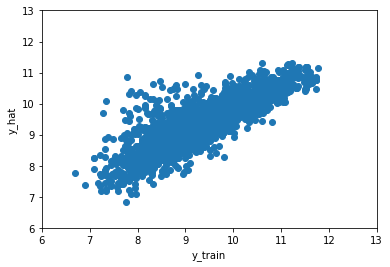

In [54]:
plt.scatter(y_train,y_hat)
plt.xlabel('y_train')
plt.ylabel('y_hat')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We have expected a straight line, at 45 Degree. but This model is situated around 45 Degree and points are close.

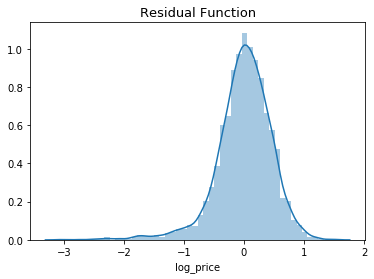

In [55]:
sns.distplot(y_train-y_hat)
plt.title('Residual Function', size=13)
plt.show()

In [56]:
reg.score(x_train,y_train)

0.7153118409469432

## Finding Weight and Bias

In [57]:
reg.coef_ # called as Weight

array([-0.49133245,  0.28525521,  0.02250571, -0.00474904, -0.10907227,
       -0.1943454 , -0.04312061, -0.10058087, -0.13021829, -0.04741086,
       -0.18404866,  0.32792206])

In [58]:
reg.intercept_ #called as bias

9.414421276672122

In [59]:
reg.summary=pd.DataFrame( X.columns.values, columns=['Features'])
reg.summary['Weight']=reg.coef_

In [60]:
reg.summary

,Features,Weight
0,Mileage,-0.491332
1,EngineV,0.285255
2,Brand_BMW,0.022506
3,Brand_Mercedes-Benz,-0.004749
4,Brand_Mitsubishi,-0.109072
5,Brand_Renault,-0.194345
6,Brand_Toyota,-0.043121
7,Brand_Volkswagen,-0.100581
8,Engine Type_Gas,-0.130218
9,Engine Type_Other,-0.047411


### Summary table analysis

* For Numeric attributes: 
Their Positive value shows if the attribute value increases, our output ie Price also increases. (Price increases with Engine V)
Their Negative value shows if the value increases, Price decreases.

* For Categorical/Dummy attributes:
Positive value Shows the attribute is more expensive than our bench mark(Audi). ie Brand value is higher than Audi.

* Mileage is the most prominant price affecting feature in this Model 

## Testing

In [61]:
y_hat_test=reg.predict(x_test)

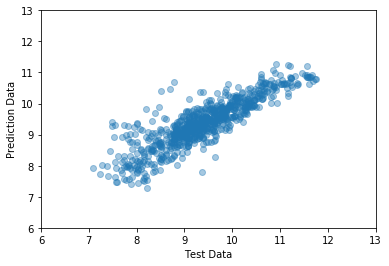

In [62]:
plt.scatter(y_test,y_hat_test,alpha=0.4)
plt.xlabel('Test Data')
plt.ylabel('Prediction Data')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Lets append the score in a dataframe, We need to take exponential of output as we have taken logaritm of test data

In [63]:
df_1=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])

In [64]:
df_1

,Predictions
0,11150.453597
1,3013.336598
2,6988.750491
3,8180.925274
4,11705.547597
...,...
769,21937.162097
770,10842.831990
771,17778.409665
772,36523.706736


In [65]:
df_1['Target']=np.exp(y_test)

In [66]:
df_1


,Predictions,Target
0,11150.453597,NaN
1,3013.336598,7900.0
2,6988.750491,NaN
3,8180.925274,NaN
4,11705.547597,NaN
...,...,...
769,21937.162097,6950.0
770,10842.831990,NaN
771,17778.409665,NaN
772,36523.706736,NaN


In [67]:
y_test=y_test.reset_index(drop=True) #This will reset the index of Y

In [68]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [69]:
df_1['Target']=np.exp(y_test)

In [70]:
df_1

,Predictions,Target
0,11150.453597,2300.0
1,3013.336598,2800.0
2,6988.750491,2500.0
3,8180.925274,6400.0
4,11705.547597,9150.0
...,...,...
769,21937.162097,29500.0
770,10842.831990,9600.0
771,17778.409665,18300.0
772,36523.706736,68500.0


#### Calculating Residual and diff% Values

In [71]:
df_1['Residual']=df_1['Target']- df_1['Predictions']

In [72]:
df_1['Diff%']=np.absolute((df_1['Residual']/df_1['Target'])*100)

In [73]:
df_1

,Predictions,Target,Residual,Diff%
0,11150.453597,2300.0,-8850.453597,384.802330
1,3013.336598,2800.0,-213.336598,7.619164
2,6988.750491,2500.0,-4488.750491,179.550020
3,8180.925274,6400.0,-1780.925274,27.826957
4,11705.547597,9150.0,-2555.547597,27.929482
...,...,...,...,...
769,21937.162097,29500.0,7562.837903,25.636739
770,10842.831990,9600.0,-1242.831990,12.946167
771,17778.409665,18300.0,521.590335,2.850220
772,36523.706736,68500.0,31976.293264,46.680720


In [74]:
df_1.describe()

,Predictions,Target,Residual,Diff%
count,774.000000,774.000000,774.000000,774.000000
mean,15696.322618,18165.817106,2469.494488,38.752557
std,12462.034621,19967.858908,11220.528528,62.189199
min,1463.148985,1200.000000,-37662.435354,0.112070
25%,7583.201657,6900.000000,-1888.289761,11.749241
50%,11897.207737,11600.000000,336.628327,24.632859
75%,19424.140778,20500.000000,3524.512680,41.259471
max,77684.205363,126000.000000,77525.188189,579.422082


In [75]:
df_1.sort_values(by=['Diff%'])

,Predictions,Target,Residual,Diff%
273,12885.543030,12900.0,14.456970,0.112070
642,8982.754651,8999.0,16.245349,0.180524
70,73767.951712,73500.0,-267.951712,0.364560
767,18726.457645,18800.0,73.542355,0.391183
693,12839.841242,12900.0,60.158758,0.466347
...,...,...,...,...
657,35391.918697,6000.0,-29391.918697,489.865312
532,10863.922501,1800.0,-9063.922501,503.551250
639,33260.129128,4999.0,-28261.129128,565.335650
162,12112.184746,1800.0,-10312.184746,572.899153


* Displaying Maximum Rows in a Dataset

In [76]:
pd.options.display.max_rows= 999
pd.set_option('display.float_format', lambda x: '%.2f'% x)
df_1.sort_values(by=['Diff%'])

,Predictions,Target,Residual,Diff%
273,12885.54,12900.00,14.46,0.11
642,8982.75,8999.00,16.25,0.18
70,73767.95,73500.00,-267.95,0.36
767,18726.46,18800.00,73.54,0.39
693,12839.84,12900.00,60.16,0.47
277,14902.60,15000.00,97.40,0.65
368,8741.28,8800.00,58.72,0.67
68,6146.26,6100.00,-46.26,0.76
446,8827.42,8900.00,72.58,0.82
612,2971.90,3000.00,28.10,0.94


## Couclusion

This Model explains the variation of Price for used cars by considering Car Mileage, Year and Engine specification.

But, going to bottom of this predicated result, We can see the Price is very less and residue difference is high. This implies that we have missed some factors may be or Data we received is not perfect. 

Possible resons are:
* May the car be damaged 
* May the car Model column that we have omitted have some significant data 
* May the car be not insured 